## Source

- Energy consumption data obtained from Appendix I: Detailed Energy Balance from page 52 of the 2023 MEMD Statistical Abstract

In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [6]:
# Load gdp data
consumpinit_inen = pd.read_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "GDP.csv"))
# Filter to 2015 and onwards
consumpinit_inen = consumpinit_inen[consumpinit_inen['year'] >= 2015].reset_index(drop=True)


consumpinit_inen.head()

,year,gdp_mmm_usd
0,2015,79.03
1,2016,82.81
2,2017,85.41
3,2018,90.79
4,2019,96.64


In [7]:
# Raw inputs: ktoe = kilotonnes of oil equivalent
iron_and_steel_ktoe = 193.0 # 2023 value in ktoe
chemical_and_petrochemical_ktoe = 32.0 # 2023 value in ktoe
nonmetallic_minerals_ktoe = 545.0 # 2023 value in ktoe
machinery_ktoe = 394.0 # 2023 value in ktoe
food_beverages_and_tobacco_ktoe = 753.0 # 2023 value in ktoe

In [8]:
# Convert ktoe to TJ
ktoe_to_tj = 41.868

# Nonmetallic minerals total energy (in TJ)
nonmetallic_minerals_tj = nonmetallic_minerals_ktoe * ktoe_to_tj

# Assumption: Share by industry
cement_share = 0.80
lime_share = 0.15
glass_share = 0.05

# Mapping
sector_mapping = {
    "consumpinit_inen_energy_tj_per_tonne_production_metals": iron_and_steel_ktoe * ktoe_to_tj,
    "consumpinit_inen_energy_tj_per_tonne_production_chemicals": chemical_and_petrochemical_ktoe * ktoe_to_tj,
    "consumpinit_inen_energy_tj_per_tonne_production_cement": nonmetallic_minerals_tj * cement_share,
    "consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite": nonmetallic_minerals_tj * lime_share,
    "consumpinit_inen_energy_tj_per_tonne_production_glass": nonmetallic_minerals_tj * glass_share,
}


In [9]:
base_year = 2023

# Set GDP scaling factor
gdp_scaling = consumpinit_inen.loc[consumpinit_inen['year'] == base_year, 'gdp_mmm_usd'].values[0]
gdp_scaling

np.float64(114.01933443209398)

In [10]:
# Filter the consumpinit_inen to only include <= base_year
consumpinit_inen = consumpinit_inen[consumpinit_inen['year'] <= base_year].reset_index(drop=True)
consumpinit_inen

,year,gdp_mmm_usd
0,2015,79.030000
1,2016,82.810000
2,2017,85.410000
3,2018,90.790000
4,2019,96.640000
5,2020,99.490000
6,2021,103.010000
7,2022,107.730000
8,2023,114.019334


In [11]:
# Scale by gdp
for col, value in sector_mapping.items():
    consumpinit_inen[col] = (value * (consumpinit_inen['gdp_mmm_usd'] / gdp_scaling))

In [12]:
consumpinit_inen

,year,gdp_mmm_usd,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_glass
0,2015,79.030000,5600.837918,928.636339,12652.670116,2372.375647,790.791882
1,2016,82.810000,5868.725649,973.052957,13257.846543,2485.846227,828.615409
2,2017,85.410000,6052.987051,1003.604071,13674.105462,2563.894774,854.631591
3,2018,90.790000,6434.266413,1066.821374,14535.441223,2725.395229,908.465076
4,2019,96.640000,6848.854567,1135.561379,15472.023789,2901.004460,967.001487
5,2020,99.490000,7050.833411,1169.050099,15928.307603,2986.557676,995.519225
6,2021,103.010000,7300.295002,1210.411606,16491.858138,3092.223401,1030.741134
7,2022,107.730000,7634.800316,1265.873627,17247.528174,3233.911533,1077.970511
8,2023,114.019334,8080.524000,1339.776000,18254.448000,3422.709000,1140.903000


In [13]:
# Drop gdp_mmm_usd as it's no longer needed
consumpinit_inen = consumpinit_inen.drop(columns=['gdp_mmm_usd'])
consumpinit_inen

,year,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_glass
0,2015,5600.837918,928.636339,12652.670116,2372.375647,790.791882
1,2016,5868.725649,973.052957,13257.846543,2485.846227,828.615409
2,2017,6052.987051,1003.604071,13674.105462,2563.894774,854.631591
3,2018,6434.266413,1066.821374,14535.441223,2725.395229,908.465076
4,2019,6848.854567,1135.561379,15472.023789,2901.004460,967.001487
5,2020,7050.833411,1169.050099,15928.307603,2986.557676,995.519225
6,2021,7300.295002,1210.411606,16491.858138,3092.223401,1030.741134
7,2022,7634.800316,1265.873627,17247.528174,3233.911533,1077.970511
8,2023,8080.524000,1339.776000,18254.448000,3422.709000,1140.903000


In [14]:
# Load prodinit data
prodinit_df = pd.read_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "prodinit_ippu.csv"))
prodinit_df.head()

,year,prodinit_ippu_cement_tonne,prodinit_ippu_plastic_tonne,prodinit_ippu_lime_and_carbonite_tonne,prodinit_ippu_glass_tonne,prodinit_ippu_paper_tonne,prodinit_ippu_rubber_and_leather_tonne,prodinit_ippu_mining_tonne,prodinit_ippu_electronics_tonne,prodinit_ippu_metals_tonne,prodinit_ippu_chemicals_tonne,prodinit_ippu_textiles_tonne,prodinit_ippu_recycled_metals_tonne,prodinit_ippu_recycled_rubber_and_leather_tonne,prodinit_ippu_recycled_textiles_tonne,prodinit_ippu_recycled_plastic_tonne,prodinit_ippu_wood_tonne,prodinit_ippu_recycled_glass_tonne,prodinit_ippu_recycled_paper_tonne
0,2015,2557000.0,82221.103820,99844.366790,6978.867111,188071.411100,6740.876602,448252.569400,50493.790280,453038.410300,50906.963930,17640.297200,0.0,0.0,0.0,0.0,1.424851e+06,0.0,0.0
1,2016,2557000.0,93732.058355,113922.422507,7962.887374,206502.409388,6882.435011,511007.929116,57562.920919,414530.145424,38383.850803,18010.743441,0.0,0.0,0.0,0.0,1.564486e+06,0.0,0.0
2,2017,2557000.0,106854.546524,129985.484081,9085.654493,226739.645508,7026.966146,582549.039192,65621.729848,379295.083063,28941.423506,18388.969053,0.0,0.0,0.0,0.0,1.717806e+06,0.0,0.0
3,2018,2557000.0,121814.183038,148313.437336,10366.731777,248960.130768,7174.532435,664105.904679,74808.772027,347055.001003,21821.833323,18775.137404,0.0,0.0,0.0,0.0,1.886151e+06,0.0,0.0
4,2019,3071000.0,125712.236895,152169.586707,10636.266803,227549.559522,8587.915325,685357.293629,77202.652731,336643.350973,26469.883821,22473.839472,0.0,0.0,0.0,0.0,1.723942e+06,0.0,0.0


In [15]:
# Perform division for each sector
consumpinit_inen["consumpinit_inen_energy_tj_per_tonne_production_metals"] /= prodinit_df["prodinit_ippu_metals_tonne"]
consumpinit_inen["consumpinit_inen_energy_tj_per_tonne_production_chemicals"] /= prodinit_df["prodinit_ippu_chemicals_tonne"]
consumpinit_inen["consumpinit_inen_energy_tj_per_tonne_production_cement"] /= prodinit_df["prodinit_ippu_cement_tonne"]
consumpinit_inen["consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite"] /= prodinit_df["prodinit_ippu_lime_and_carbonite_tonne"]
consumpinit_inen["consumpinit_inen_energy_tj_per_tonne_production_glass"] /= prodinit_df["prodinit_ippu_glass_tonne"]


In [16]:
consumpinit_inen

,year,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_glass
0,2015,0.012363,0.018242,0.004948,0.023761,0.113312
1,2016,0.014158,0.025351,0.005185,0.021821,0.104060
2,2017,0.015959,0.034677,0.005348,0.019724,0.094064
3,2018,0.018540,0.048888,0.005685,0.018376,0.087633
4,2019,0.020345,0.042900,0.005038,0.019064,0.090915
5,2020,0.019322,0.038472,0.004261,0.015285,0.072895
6,2021,0.019690,0.037756,0.003581,0.016434,0.078373
7,2022,0.019574,0.040540,0.003702,0.016967,0.080913
8,2023,0.020717,0.042907,0.003918,0.017957,0.085636


In [17]:
# read global data and filter it to only include consumpinit_inen_energy columns
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
og_consumpinit_inen_df = uga_global_df[[col for col in uga_global_df.columns if col.startswith("consumpinit_inen_energy") and "production" in col]].copy()

# Remove fields that are already in consumpinit_inen
for col in consumpinit_inen.columns:
    if col in og_consumpinit_inen_df.columns:
        og_consumpinit_inen_df = og_consumpinit_inen_df.drop(columns=[col])

# add year column to the og_consumpinit_inen_df
og_consumpinit_inen_df['year'] = 2015 + og_consumpinit_inen_df.index

# Merge the consumpinit_inen with the og_consumpinit_inen_df
consumpinit_inen = pd.merge(consumpinit_inen, og_consumpinit_inen_df, on='year', how='left')
consumpinit_inen

,year,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_textiles,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_mining,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_wood
0,2015,0.012363,0.018242,0.004948,0.023761,0.113312,0,2.466924,0,0.226214,0.047135,0.192138,0.047135,0.192138,1.132014,0,0.552247,2.466924,0,0
1,2016,0.014158,0.025351,0.005185,0.021821,0.104060,0,2.750624,0,0.189221,0.032944,0.172432,0.032944,0.172432,1.233532,0,0.762306,2.750624,0,0
2,2017,0.015959,0.034677,0.005348,0.019724,0.094064,0,3.418313,0,0.205678,0.037941,0.197388,0.037941,0.197388,1.387190,0,0.532490,3.418313,0,0
3,2018,0.018540,0.048888,0.005685,0.018376,0.087633,0,3.670825,0,0.185181,0.038392,0.171146,0.038392,0.171146,1.746665,0,0.510180,3.670825,0,0
4,2019,0.020345,0.042900,0.005038,0.019064,0.090915,0,4.848191,0,0.238077,0.043350,0.198569,0.043350,0.198569,1.988539,0,0.804189,4.848191,0,0
5,2020,0.019322,0.038472,0.004261,0.015285,0.072895,0,4.006999,0,0.316212,0.046650,0.203474,0.046650,0.203474,1.858035,0,0.828442,4.006999,0,0
6,2021,0.019690,0.037756,0.003581,0.016434,0.078373,0,4.060754,0,0.317843,0.048590,0.205888,0.048590,0.205888,1.900630,0,0.840864,4.060754,0,0
7,2022,0.019574,0.040540,0.003702,0.016967,0.080913,0,3.759920,0,0.312103,0.048590,0.196205,0.048590,0.196205,1.861781,0,0.725125,3.759920,0,0
8,2023,0.020717,0.042907,0.003918,0.017957,0.085636,0,3.480211,0,0.306435,0.048516,0.186924,0.048516,0.186924,1.822415,0,0.625057,3.480211,0,0


In [18]:
# Check for nans
consumpinit_inen.isna().sum()

year                                                                           0
consumpinit_inen_energy_tj_per_tonne_production_metals                         0
consumpinit_inen_energy_tj_per_tonne_production_chemicals                      0
consumpinit_inen_energy_tj_per_tonne_production_cement                         0
consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite             0
consumpinit_inen_energy_tj_per_tonne_production_glass                          0
consumpinit_inen_energy_tj_per_tonne_production_paper                          0
consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather    0
consumpinit_inen_energy_tj_per_tonne_production_recycled_paper                 0
consumpinit_inen_energy_tj_per_tonne_production_recycled_wood                  0
consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles              0
consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic               0
consumpinit_inen_energy_tj_p

In [19]:
# project to 2100
consumpinit_inen = gu.extend_projection(consumpinit_inen, base_year + 1, 2100)
consumpinit_inen

,year,consumpinit_inen_energy_tj_per_tonne_production_metals,consumpinit_inen_energy_tj_per_tonne_production_chemicals,consumpinit_inen_energy_tj_per_tonne_production_cement,consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite,consumpinit_inen_energy_tj_per_tonne_production_glass,consumpinit_inen_energy_tj_per_tonne_production_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_recycled_paper,consumpinit_inen_energy_tj_per_tonne_production_recycled_wood,consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles,consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic,consumpinit_inen_energy_tj_per_tonne_production_textiles,consumpinit_inen_energy_tj_per_tonne_production_plastic,consumpinit_inen_energy_tj_per_tonne_production_recycled_glass,consumpinit_inen_energy_tj_per_tonne_production_recycled_metals,consumpinit_inen_energy_tj_per_tonne_production_mining,consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather,consumpinit_inen_energy_tj_per_tonne_production_electronics,consumpinit_inen_energy_tj_per_tonne_production_wood
0,2015,0.012363,0.018242,0.004948,0.023761,0.113312,0.0,2.466924,0.0,0.226214,0.047135,0.192138,0.047135,0.192138,1.132014,0.0,0.552247,2.466924,0.0,0.0
1,2016,0.014158,0.025351,0.005185,0.021821,0.104060,0.0,2.750624,0.0,0.189221,0.032944,0.172432,0.032944,0.172432,1.233532,0.0,0.762306,2.750624,0.0,0.0
2,2017,0.015959,0.034677,0.005348,0.019724,0.094064,0.0,3.418313,0.0,0.205678,0.037941,0.197388,0.037941,0.197388,1.387190,0.0,0.532490,3.418313,0.0,0.0
3,2018,0.018540,0.048888,0.005685,0.018376,0.087633,0.0,3.670825,0.0,0.185181,0.038392,0.171146,0.038392,0.171146,1.746665,0.0,0.510180,3.670825,0.0,0.0
4,2019,0.020345,0.042900,0.005038,0.019064,0.090915,0.0,4.848191,0.0,0.238077,0.043350,0.198569,0.043350,0.198569,1.988539,0.0,0.804189,4.848191,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2096,0.020717,0.042907,0.003918,0.017957,0.085636,0.0,3.480211,0.0,0.306435,0.048516,0.186924,0.048516,0.186924,1.822415,0.0,0.625057,3.480211,0.0,0.0
82,2097,0.020717,0.042907,0.003918,0.017957,0.085636,0.0,3.480211,0.0,0.306435,0.048516,0.186924,0.048516,0.186924,1.822415,0.0,0.625057,3.480211,0.0,0.0
83,2098,0.020717,0.042907,0.003918,0.017957,0.085636,0.0,3.480211,0.0,0.306435,0.048516,0.186924,0.048516,0.186924,1.822415,0.0,0.625057,3.480211,0.0,0.0
84,2099,0.020717,0.042907,0.003918,0.017957,0.085636,0.0,3.480211,0.0,0.306435,0.048516,0.186924,0.048516,0.186924,1.822415,0.0,0.625057,3.480211,0.0,0.0


## Validation

In [20]:
# check for duplicates
gu.check_duplicates(consumpinit_inen)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


In [21]:
[col for col in uga_global_df.columns if col.startswith("consumpinit_inen_energy") and "production" in col]

['consumpinit_inen_energy_tj_per_tonne_production_paper',
 'consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather',
 'consumpinit_inen_energy_tj_per_tonne_production_glass',
 'consumpinit_inen_energy_tj_per_tonne_production_recycled_paper',
 'consumpinit_inen_energy_tj_per_tonne_production_recycled_wood',
 'consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles',
 'consumpinit_inen_energy_tj_per_tonne_production_cement',
 'consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic',
 'consumpinit_inen_energy_tj_per_tonne_production_textiles',
 'consumpinit_inen_energy_tj_per_tonne_production_plastic',
 'consumpinit_inen_energy_tj_per_tonne_production_recycled_glass',
 'consumpinit_inen_energy_tj_per_tonne_production_recycled_metals',
 'consumpinit_inen_energy_tj_per_tonne_production_mining',
 'consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather',
 'consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite',
 'consumpinit_in

Comparing consumpinit_inen_energy_tj_per_tonne_production_metals...


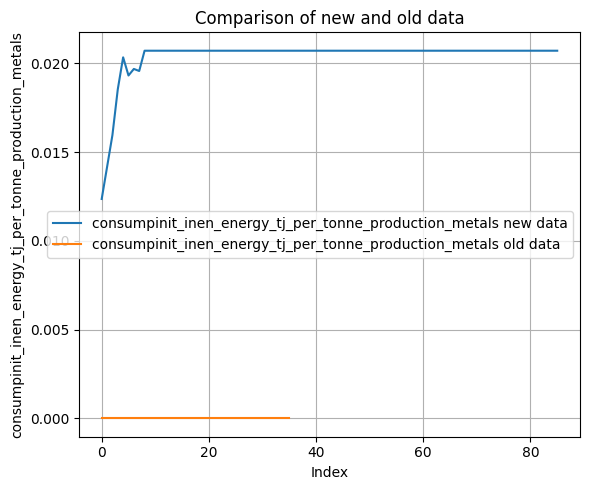

Comparing consumpinit_inen_energy_tj_per_tonne_production_chemicals...


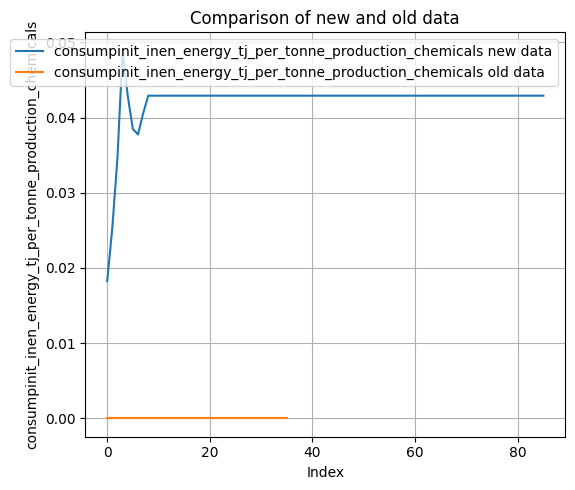

Comparing consumpinit_inen_energy_tj_per_tonne_production_cement...


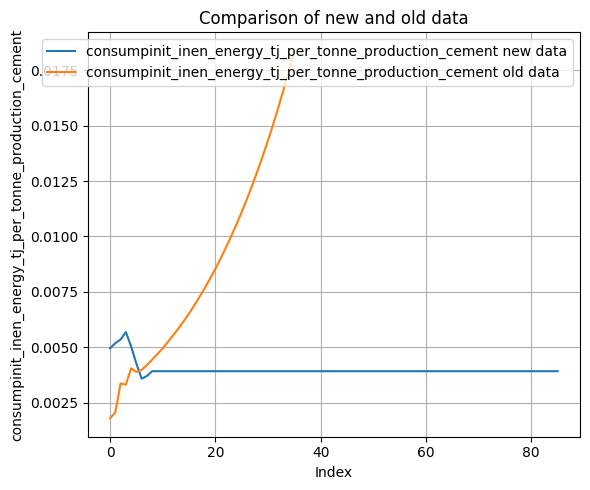

Comparing consumpinit_inen_energy_tj_per_tonne_production_lime_and_carbonite...


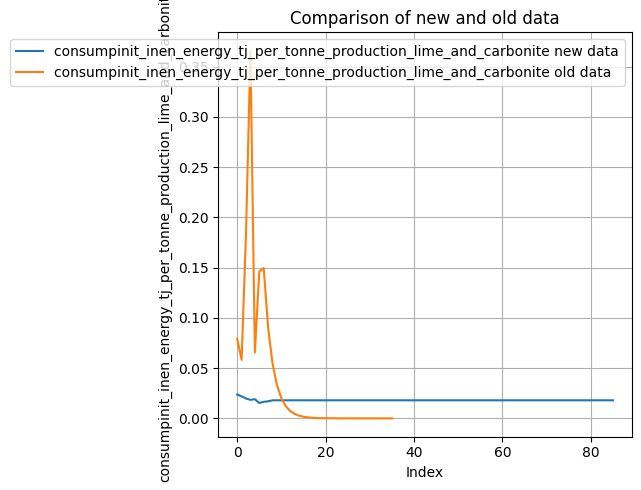

Comparing consumpinit_inen_energy_tj_per_tonne_production_glass...


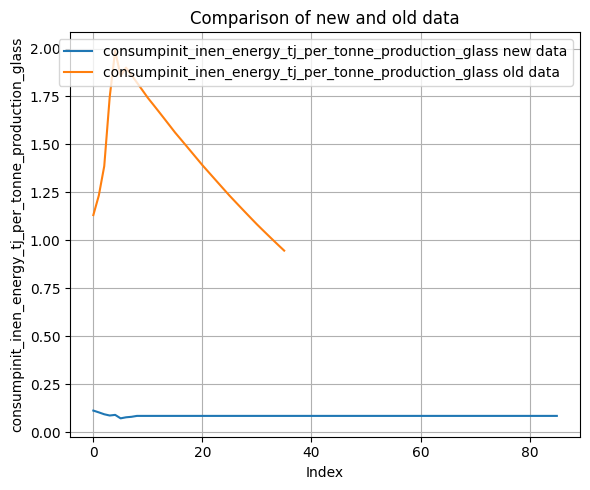

Comparing consumpinit_inen_energy_tj_per_tonne_production_paper...


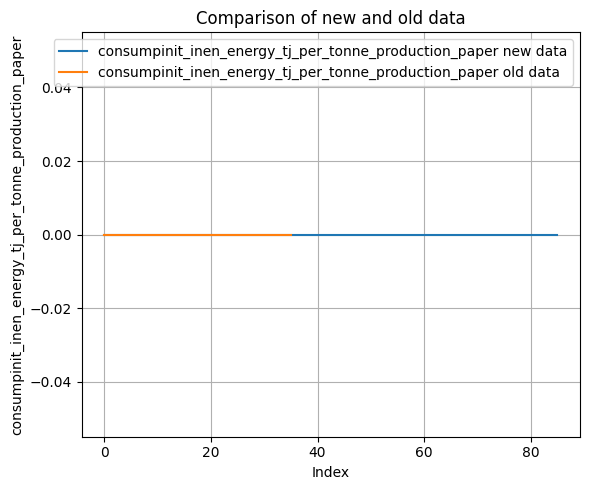

Comparing consumpinit_inen_energy_tj_per_tonne_production_recycled_rubber_and_leather...


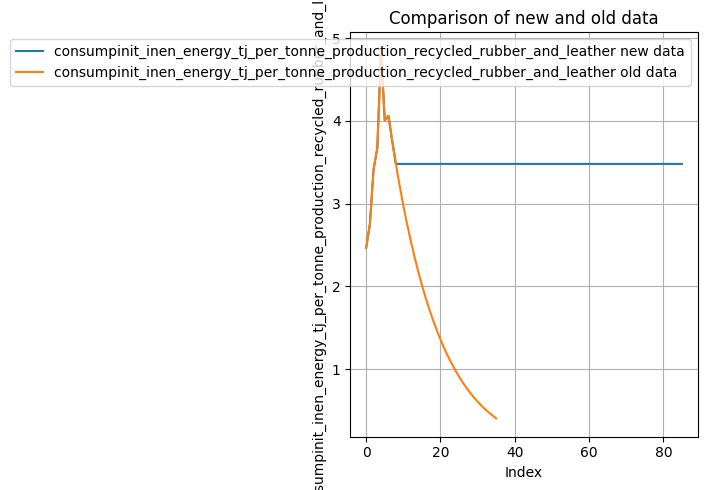

Comparing consumpinit_inen_energy_tj_per_tonne_production_recycled_paper...


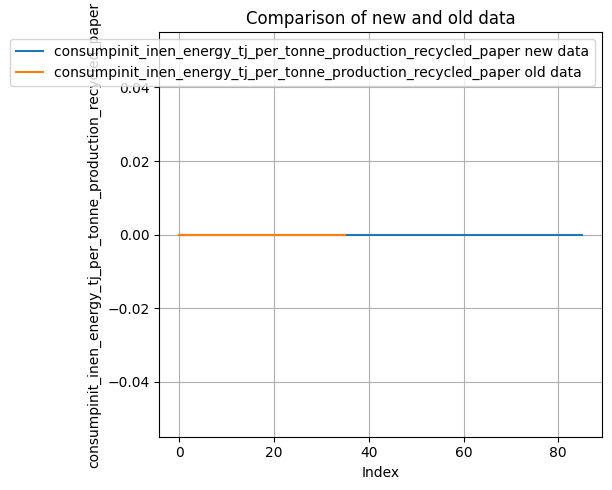

Comparing consumpinit_inen_energy_tj_per_tonne_production_recycled_wood...


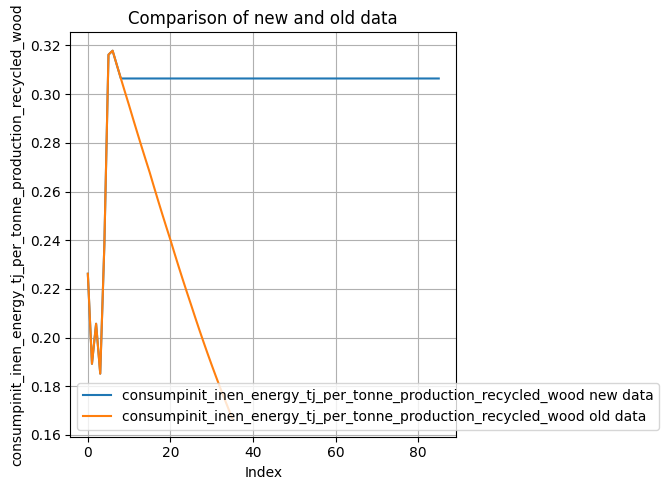

Comparing consumpinit_inen_energy_tj_per_tonne_production_recycled_textiles...


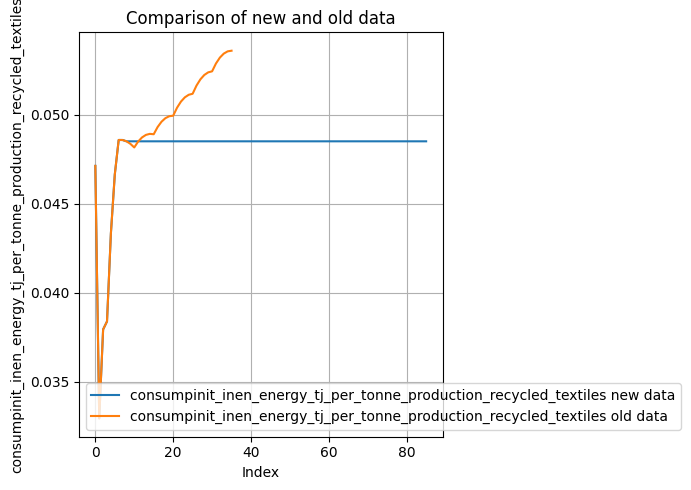

Comparing consumpinit_inen_energy_tj_per_tonne_production_recycled_plastic...


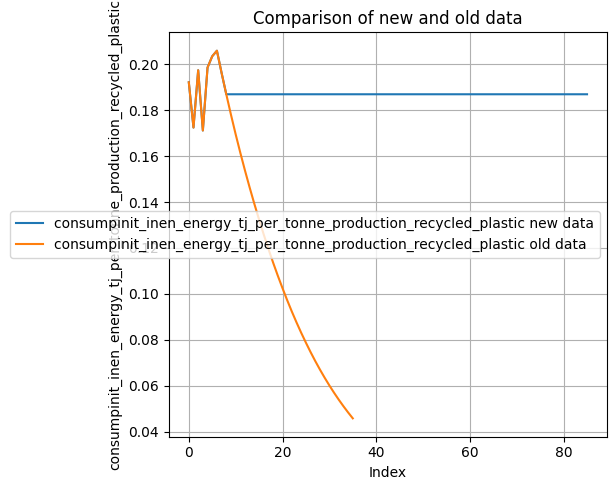

Comparing consumpinit_inen_energy_tj_per_tonne_production_textiles...


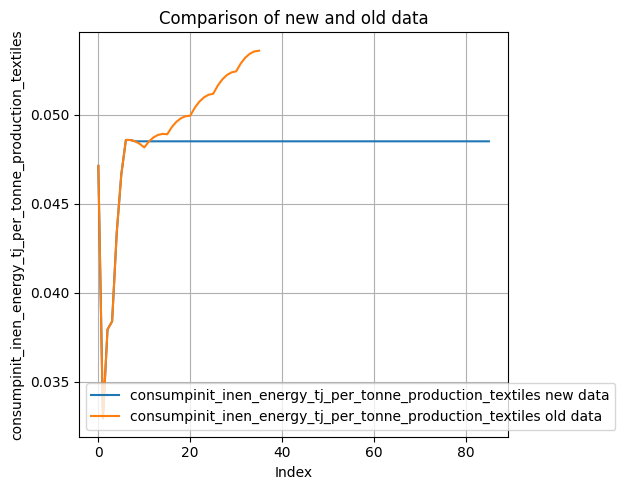

Comparing consumpinit_inen_energy_tj_per_tonne_production_plastic...


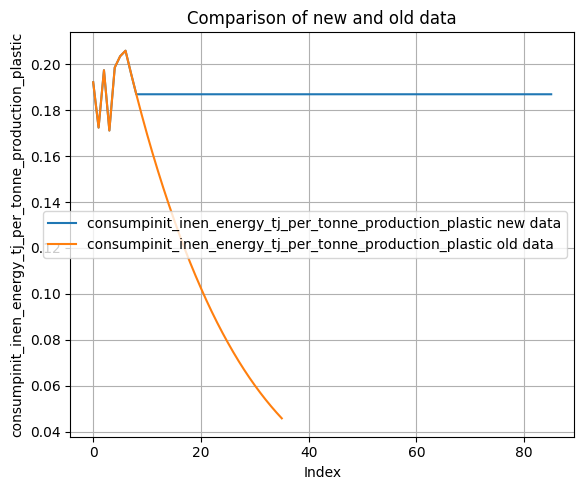

Comparing consumpinit_inen_energy_tj_per_tonne_production_recycled_glass...


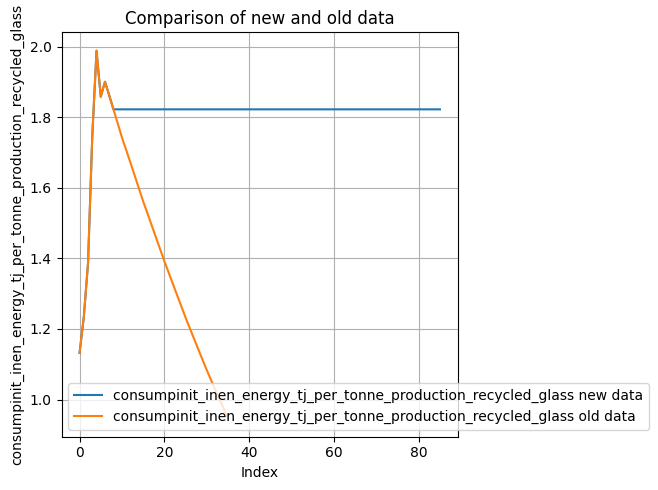

Comparing consumpinit_inen_energy_tj_per_tonne_production_recycled_metals...


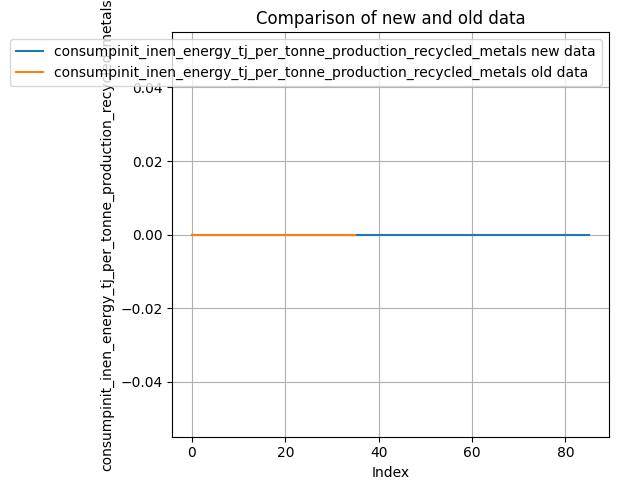

Comparing consumpinit_inen_energy_tj_per_tonne_production_mining...


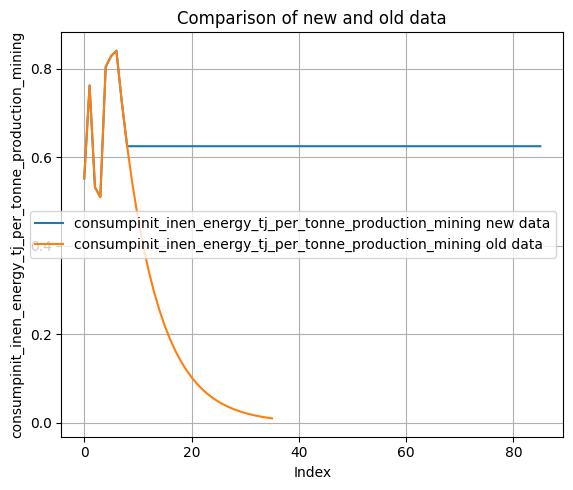

Comparing consumpinit_inen_energy_tj_per_tonne_production_rubber_and_leather...


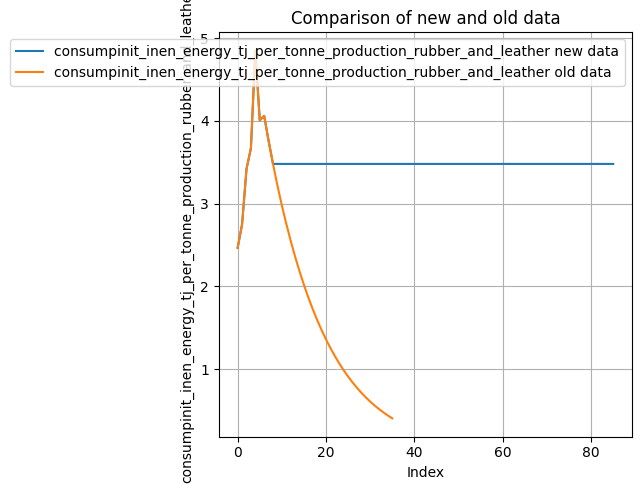

Comparing consumpinit_inen_energy_tj_per_tonne_production_electronics...


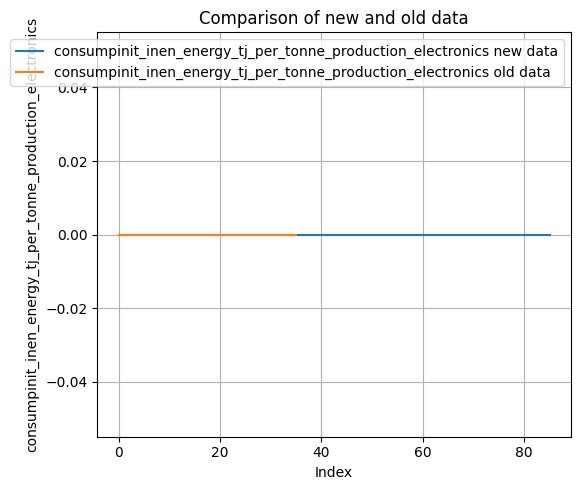

Comparing consumpinit_inen_energy_tj_per_tonne_production_wood...


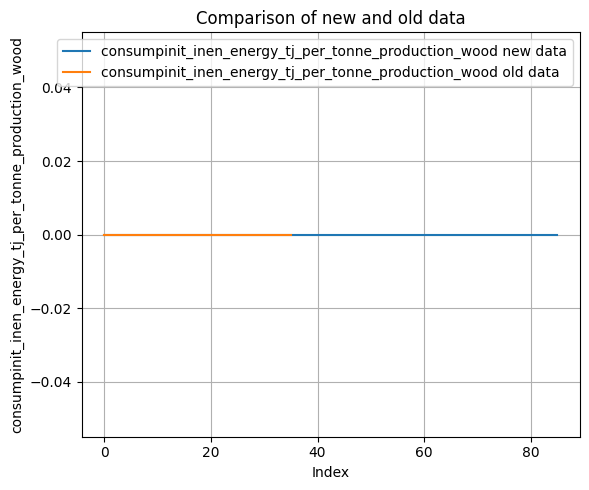

In [22]:
for var in consumpinit_inen.columns:
    if var != 'year':
        print(f"Comparing {var}...")
        edau.compare_variables(consumpinit_inen, uga_global_df, [var])

## Save

In [23]:
consumpinit_inen.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "consumpinit_inen_production.csv"), index=False)